In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2
from PIL import Image

In [2]:
#unzipping the folder containing the image dataset
# import zipfile
# with zipfile.ZipFile('image_dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('celeb_img')

In [3]:
import os

# opening up the training set directory
path = './celeb_img/14-celebrity-faces-dataset/data/train/'
dir_list=os.listdir(path)

#storing the names of the celebrity folders in folder list
folder=[]
for name in dir_list:
    print(name)
    folder.append(name)
    for file in os.listdir(path+name+'/'):
        print(file)
    
#accessing all the image files in each celebrity folder list 
#and renaming them number-wise
# for name in folder:
#     num=1
#     new_path=path+name+'/'
#     for file in os.listdir(path+name):
#         src=new_path+file
#         dest=new_path+name+f"{num}"
#         num+=1;
#         os.rename(src,dest)

anne_hathaway
.ipynb_checkpoints
anne_hathaway1
anne_hathaway10
anne_hathaway11
anne_hathaway12
anne_hathaway13
anne_hathaway14
anne_hathaway15
anne_hathaway2
anne_hathaway3
anne_hathaway4
anne_hathaway5
anne_hathaway6
anne_hathaway7
anne_hathaway8
anne_hathaway9
arnold_schwarzenegger
.ipynb_checkpoints
arnold_schwarzenegger1
arnold_schwarzenegger10
arnold_schwarzenegger11
arnold_schwarzenegger12
arnold_schwarzenegger13
arnold_schwarzenegger14
arnold_schwarzenegger15
arnold_schwarzenegger16
arnold_schwarzenegger17
arnold_schwarzenegger18
arnold_schwarzenegger2
arnold_schwarzenegger3
arnold_schwarzenegger4
arnold_schwarzenegger5
arnold_schwarzenegger6
arnold_schwarzenegger7
arnold_schwarzenegger8
arnold_schwarzenegger9
ben_afflek
.ipynb_checkpoints
ben_afflek1
ben_afflek10
ben_afflek11
ben_afflek12
ben_afflek13
ben_afflek14
ben_afflek2
ben_afflek3
ben_afflek4
ben_afflek5
ben_afflek6
ben_afflek7
ben_afflek8
ben_afflek9
dwayne_johnson
.ipynb_checkpoints
dwayne_johnson1
dwayne_johnson10
dw

In [4]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

train_path = r'.//celeb_img//14-celebrity-faces-dataset//data//train//'
test_path = r'.//celeb_img//14-celebrity-faces-dataset//data//test//'

train_img=[]
for name in folder:
    path = train_path+name+'//'
    for file in os.listdir(path):
        if(file=='.ipynb_checkpoints'):
            continue
        img=cv2.imread(path+file)
        gray_img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(img,1.07,10,cv2.CASCADE_SCALE_IMAGE,(53,53))
        for x,y,w,h in faces:
            #img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),4)
            im_crop = img[y:y+h,x:x+w]
            im_crop = cv2.resize(im_crop,(64,64))
            im_crop=im_crop.flatten()
            im_crop=list(im_crop)
            im_crop.insert(0,name)
            train_img.append(im_crop)
#print("training images:\n",train_img)

test_img=[]
for name in folder:
    path = test_path+name+'//'
    for file in os.listdir(path):
        if(file=='.ipynb_checkpoints'):
            continue
        img=cv2.imread(path+file)
        gray_img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(img,1.07,10,cv2.CASCADE_SCALE_IMAGE,(53,53))
        for x,y,w,h in faces:
            #img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),4)
            im_crop = img[y:y+h,x:x+w]
            im_crop = cv2.resize(im_crop,(64,64))
            im_crop=im_crop.flatten()
            im_crop=list(im_crop)
            im_crop.insert(0,name)
            test_img.append(im_crop)
#print("\ntesting images\n:",test_img)
     
        

In [5]:
import csv
columns = np.arange(64**2)
columns = list(columns)
columns.insert(0,'name')
with open('train.csv','w') as out:
    writer=csv.DictWriter(out,fieldnames=columns)
    writer.writeheader()
    d = dict()
    for row in train_img:
        for i in range(len(columns)):
            index = columns[i]
            d[index]=row[i]
        writer.writerow(d)

train = pd.read_csv('train.csv')
train.sort_values(by='4000')
print(train)
print(train.dtypes)
train=np.array(train)
train

              name    0    1    2    3    4    5    6    7    8  ...  4086  \
0    anne_hathaway   18   53  118   18   53  114   25   56  115  ...    79   
1    anne_hathaway  110   69  107  105   71  110  104   87  124  ...    20   
2    anne_hathaway   36   37   42   30   31   36   28   29   34  ...   146   
3    anne_hathaway  238  236  236  238  236  236  238  236  236  ...   111   
4    anne_hathaway   88   47   50   79   49   60   73   59   77  ...    10   
..             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
196     will_smith  134  133  148  205  194  196  202  190  186  ...    28   
197     will_smith   13   15   15   31   33   33   31   33   33  ...    57   
198     will_smith  234  222  215  176  151  150  203  184  190  ...   102   
199     will_smith   14   18   39   24   32   52   23   33   53  ...    37   
200     will_smith   30   36   56   25   30   53   21   25   50  ...    26   

     4087  4088  4089  4090  4091  4092  4093  4094  4095  
0  

array([['anne_hathaway', 18, 53, ..., 116, 214, 87],
       ['anne_hathaway', 110, 69, ..., 26, 39, 21],
       ['anne_hathaway', 36, 37, ..., 137, 171, 127],
       ...,
       ['will_smith', 234, 222, ..., 85, 159, 56],
       ['will_smith', 14, 18, ..., 80, 130, 48],
       ['will_smith', 30, 36, ..., 47, 98, 45]], dtype=object)

In [6]:
with open('test.csv','w') as out:
    writer=csv.DictWriter(out,fieldnames=columns)
    writer.writeheader()
    d = dict()
    for row in test_img:
        for i in range(len(columns)):
            index = columns[i]
            d[index]=row[i]
        writer.writerow(d)

test = pd.read_csv('test.csv')
test.sort_values(by='4000')
print(test)
print(test.dtypes)
test=np.array(test)
test

             name    0    1    2    3    4    5    6    7    8  ...  4086  \
0   anne_hathaway  228  216  214  229  217  215  228  220  222  ...    48   
1   anne_hathaway   21   30   39   33   42   51   22   30   39  ...    34   
2   anne_hathaway   36   36   36   33   32   34   32   31   33  ...    70   
3   anne_hathaway   34   43   36   24   38   32   30   40   34  ...    81   
4   anne_hathaway  101  218  253  112  219  251  126  222  252  ...   133   
..            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
60     will_smith   32   42   75   25   30   59   24   25   51  ...    45   
61     will_smith  216  211  217  220  216  221  222  219  222  ...   117   
62     will_smith   56   52   41   59   55   41   63   57   43  ...   122   
63     will_smith  132  149  175  163  172  195  180  185  202  ...    82   
64     will_smith  216  217  243  217  221  246  219  222  250  ...   104   

    4087  4088  4089  4090  4091  4092  4093  4094  4095  
0     59   117  

array([['anne_hathaway', 228, 216, ..., 47, 104, 22],
       ['anne_hathaway', 21, 30, ..., 48, 95, 24],
       ['anne_hathaway', 36, 36, ..., 84, 158, 72],
       ...,
       ['will_smith', 56, 52, ..., 122, 184, 105],
       ['will_smith', 132, 149, ..., 78, 148, 44],
       ['will_smith', 216, 217, ..., 88, 155, 67]], dtype=object)

In [7]:
import math
def EuclideanDistance(train,test):
    dist=np.sum((train-test)**2)
    return math.sqrt(dist)


def KNNClassifier(trainSet, testInst, K,count):
    neighbours=[]
    
    for row in range(trainSet.shape[0]):
        #print(trainSet[row,1:],testInst[1:])
        dist=EuclideanDistance(trainSet[row,1:],testInst[1:])
        neighbours.append((trainSet[row][0],dist))
        
    neighbours=sorted(neighbours, key = lambda x:x[1])
    
    for i in range(K):
        label=neighbours[i][0]
        count[label]+=1
    maxCount=0
    ResultLabel=-1
    for label in count:
        if count[label]>maxCount:
            maxCount=count[label]
            ResultLabel=label
    return ResultLabel,count


def TestAccuracy(test,prediction):
    correct=0
    for i in range(test.shape[0]):
        if test[i][0]==prediction[i]:
            correct+=1
    return (correct/test.shape[0])*100


def plotAccuracy(accuracy):
  plt.plot(accuracy)
  plt.xlabel('K-values')
  plt.ylabel('Accuracy')

In [8]:
accuracy_val=[]

for j in range(1,41,2):
  Predictions=[]
  for i in range(test.shape[0]):
    count={}.fromkeys(folder,0)
    p,count=KNNClassifier(train,test[i],j,count)
    Predictions.append(p)
  accuracy = TestAccuracy(test,Predictions)
  accuracy_val.append(accuracy)
  print(f"% accuracy for k={j} is {accuracy}% ")

% accuracy for k=1 is 16.923076923076923% 
% accuracy for k=3 is 10.76923076923077% 
% accuracy for k=5 is 12.307692307692308% 
% accuracy for k=7 is 13.846153846153847% 
% accuracy for k=9 is 15.384615384615385% 
% accuracy for k=11 is 20.0% 
% accuracy for k=13 is 18.461538461538463% 
% accuracy for k=15 is 13.846153846153847% 
% accuracy for k=17 is 16.923076923076923% 
% accuracy for k=19 is 16.923076923076923% 
% accuracy for k=21 is 15.384615384615385% 
% accuracy for k=23 is 16.923076923076923% 
% accuracy for k=25 is 15.384615384615385% 
% accuracy for k=27 is 15.384615384615385% 
% accuracy for k=29 is 15.384615384615385% 
% accuracy for k=31 is 15.384615384615385% 
% accuracy for k=33 is 16.923076923076923% 
% accuracy for k=35 is 16.923076923076923% 
% accuracy for k=37 is 16.923076923076923% 
% accuracy for k=39 is 15.384615384615385% 


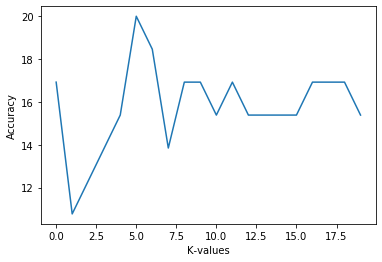

In [10]:
plotAccuracy(accuracy_val)